In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Monthly-car-sales.csv', parse_dates=True, index_col=0, header=0, infer_datetime_format=True)
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


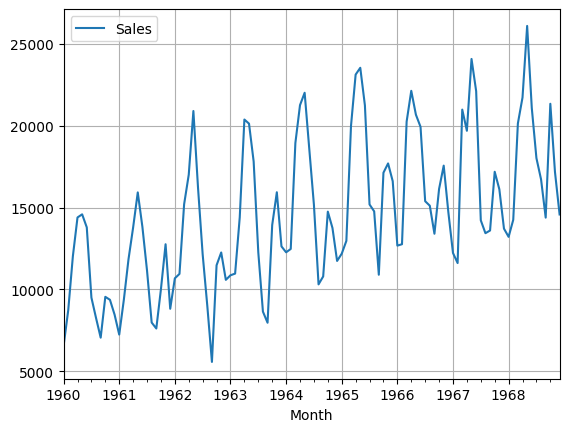

In [3]:
data.plot()
plt.grid()

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

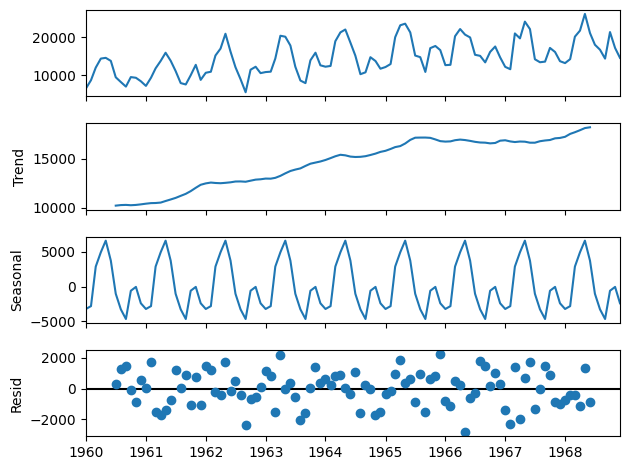

In [5]:
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

In [6]:
train_index = int(len(data) * 0.8)
split_index = train_index

In [7]:
train_data = data[:split_index]
test_data = data[split_index:]

In [8]:
train_data

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1966-10-01,16135
1966-11-01,17562
1966-12-01,14720


In [20]:
test_data.squeeze()

Month
1967-03-01    20985
1967-04-01    19692
1967-05-01    24081
1967-06-01    22114
1967-07-01    14220
1967-08-01    13434
1967-09-01    13598
1967-10-01    17187
1967-11-01    16119
1967-12-01    13713
1968-01-01    13210
1968-02-01    14251
1968-03-01    20139
1968-04-01    21725
1968-05-01    26099
1968-06-01    21084
1968-07-01    18024
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Sales, dtype: int64

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
warnings.filterwarnings('ignore')
hwmodel = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'multiplicative', seasonal_periods = 12).fit()

In [12]:
test_pred = hwmodel.forecast(22)

In [ ]:
test_pred = pd.DataFrame(in)

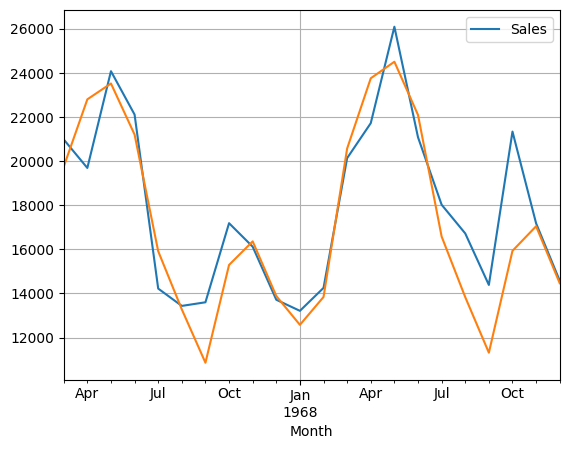

In [13]:
test_data.plot()
test_pred.plot()
plt.legend()
plt.grid()

In [19]:
warnings.filterwarnings('ignore')
hwmodel = ExponentialSmoothing(data, trend = 'add', seasonal = 'multiplicative', seasonal_periods = 12).fit()

In [29]:
prediction = hwmodel.forecast(60)

In [30]:
round(prediction, 0)

1969-01-01    14239.0
1969-02-01    14840.0
1969-03-01    22806.0
1969-04-01    24676.0
1969-05-01    27911.0
1969-06-01    24271.0
1969-07-01    18493.0
1969-08-01    16546.0
1969-09-01    14333.0
1969-10-01    19491.0
1969-11-01    17995.0
1969-12-01    15924.0
1970-01-01    14560.0
1970-02-01    15175.0
1970-03-01    23319.0
1970-04-01    25230.0
1970-05-01    28537.0
1970-06-01    24814.0
1970-07-01    18906.0
1970-08-01    16915.0
1970-09-01    14652.0
1970-10-01    19924.0
1970-11-01    18394.0
1970-12-01    16276.0
1971-01-01    14882.0
1971-02-01    15509.0
1971-03-01    23833.0
1971-04-01    25784.0
1971-05-01    29163.0
1971-06-01    25357.0
1971-07-01    19319.0
1971-08-01    17284.0
1971-09-01    14971.0
1971-10-01    20357.0
1971-11-01    18793.0
1971-12-01    16629.0
1972-01-01    15203.0
1972-02-01    15844.0
1972-03-01    24346.0
1972-04-01    26338.0
1972-05-01    29789.0
1972-06-01    25900.0
1972-07-01    19732.0
1972-08-01    17653.0
1972-09-01    15290.0
1972-10-01

In [31]:
new_dataFrame = pd.DataFrame(data=[{'Months': range(len(test_data)), 'Actual': test_data, 'Predictions': test_pred}])

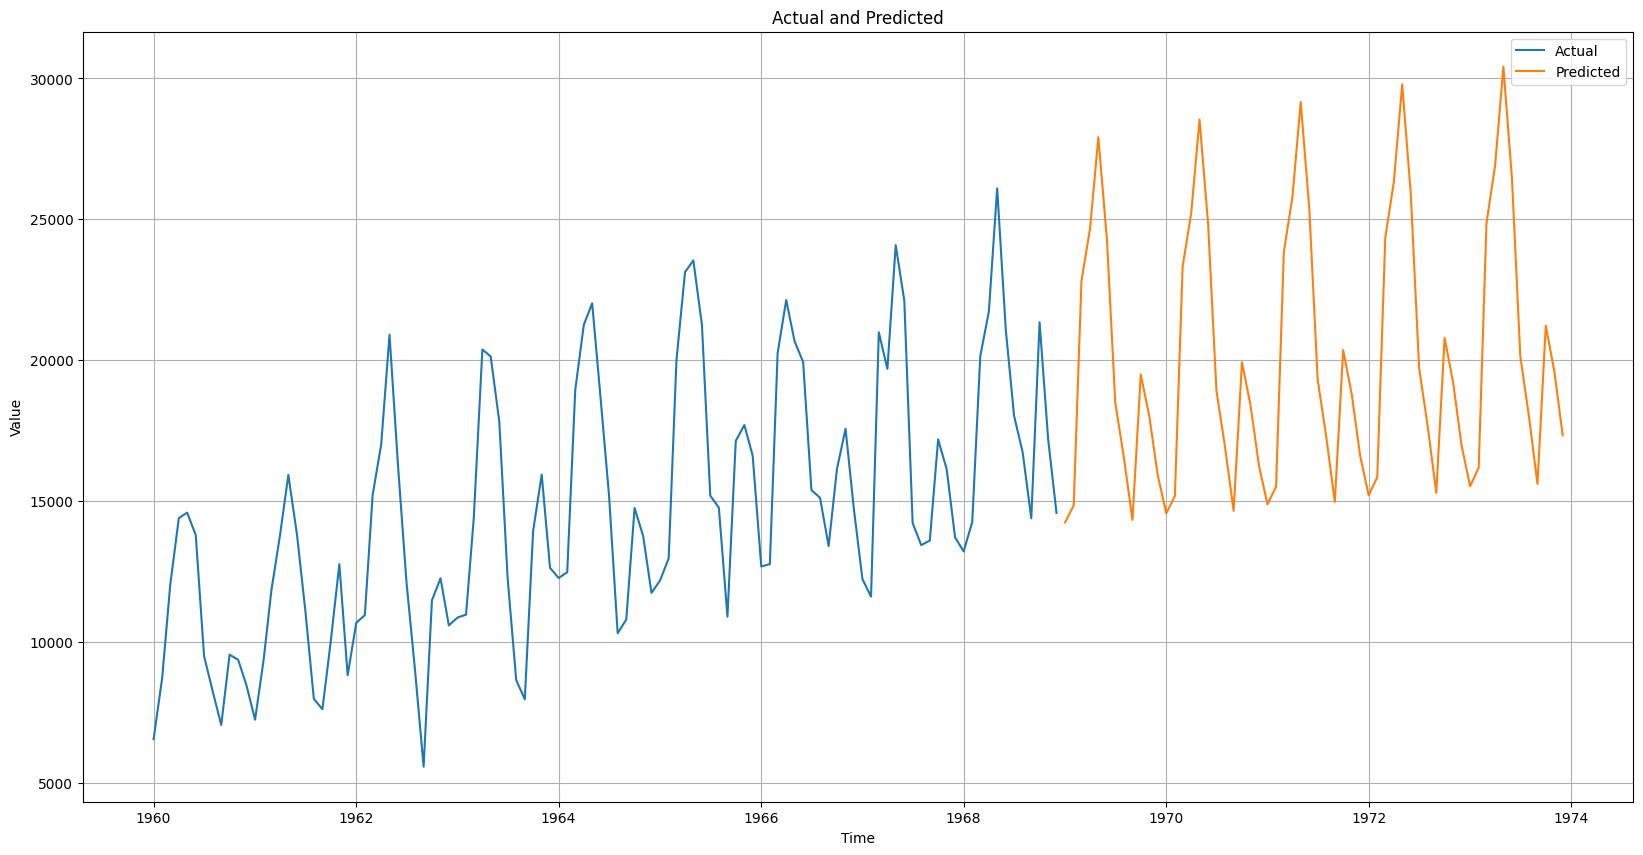

In [33]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the actual values
ax.plot(data, label='Actual')

# Plot the predicted values
ax.plot(prediction, label='Predicted')

# Set the plot title and labels
plt.title('Actual and Predicted')
plt.xlabel('Time')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.show()